### Gather
Three files are needed for this project. They include
> + `twitter-archive-enhanced.csv`
> + `image-predictions.tsv`
> + `tweet-json.txt`

In [2]:
# Import the necessary packages 
import pandas as pd
import json
import requests


In [3]:
# Read the first file
twi_arch_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Download the second file using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Save the file to in a .tsv file format
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

# Read the second file
img_df = pd.read_csv("image-predictions.tsv", sep="\t")

In [5]:
# Read the third file 
tweets = []
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweets.append(data)
tweet_df = pd.DataFrame(tweets, columns=['id','retweet_count','favorite_count'])

### Assess

In [6]:
twi_arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
img_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Quality issues
> + twi_arch_df - source column contains html anchor tags
> + img_df - p1 have some values in uppercase and others in lowercase
> + img_df - p2 have some values in uppercase and others in lowercase
> + img_df - p3 have some values in uppercase and others in lowercase
> + twi_arch_df - Some records have their values in the name column as a, an, the, my
> + twi_arch_df - Some records have their values in the name column as such, quite, one, very, officially, just which are all in lowercase
> + twi_arch_df - timestamp should have a datatype of datetime instead of string
> + twi_arch_df - rating_denominator have values that are below 10
> + twi_arch_df - rating_denominator have values that are above 10
> + twi_arch_df - rating_numerator have values that are zero
> + img_df - 66 records are considered to be duplicated in the jpg_url. One of the duplicated jpg_urls is `https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg`
> + twi_arch_df - missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns
> + twi_arch_df - Some records have their values in the name column as None
> + twi_arch_df - Some records have their values in the name column being abbreviated e.g JD
> + tweet_df - favorite_count is 0 despite a high value for retweet_count

#### Tidiness issues
> + The columns - doggo, floofer, pupper, puppo should be values in the stage column instead of standing as independent columns in twi_arch_df
> + retweet_count and favorite_count columns should be part of twi_arch_df

In [9]:
twi_arch_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [10]:
twi_arch_df[twi_arch_df['name']== 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [12]:
twi_arch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
twi_arch_df.query("name == 'such'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [16]:
img_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
twi_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twi_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
img_df[img_df['jpg_url'].duplicated()].head(33)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [21]:
img_df[img_df['jpg_url'].duplicated()].tail(33)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1605,800443802682937345,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
1640,807059379405148160,https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg,1,seat_belt,0.474292,False,golden_retriever,0.171393,True,Labrador_retriever,0.110592,True
1645,808134635716833280,https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg,1,cocker_spaniel,0.740220,True,Dandie_Dinmont,0.061604,True,English_setter,0.041331,True


In [22]:
img_df.query("jpg_url == 'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [23]:
tweet_df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [24]:
tweet_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [25]:
# Get the record whose name is JD
twi_arch_df.query("name == 'JD'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [27]:
# Get the top 40 records whose name starts with J
twi_arch_df[twi_arch_df['name'].str.startswith("J")].head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
21,887705289381826560,NaN,NaN,2017-07-19 16:06:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,None,None,None,None
33,885984800019947520,NaN,NaN,2017-07-14 22:10:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion advised. This is Jimbo. He w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None


### Clean

In [28]:
# Make a copy of the three dataframes
tweet_df_copy = tweet_df.copy()
img_df_copy = img_df.copy()
twi_arch_df_copy = twi_arch_df.copy()


#### Quality

#### Some records have their values in the name column of twi_arch_df_copy DataFrame as a, an, the, my, such, quite, one, very, officially, just, his

#### Define
> + Replace those values with None since they don't make any sense

#### Code

In [29]:
# Create a list that contains bad names and replace it with None
bad_names = ['a','an','the','my','such', 'quite', 'one', 'very', 'officially','just', 'his', 'by']
for bnames in bad_names:
    twi_arch_df_copy.replace(bnames,'None',inplace=True)

#### Test

In [33]:
twi_arch_df_copy.query('name in @bad_names')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### timestamp coumn in the twi_arch_df_copy DataFrame should have a datatype of datetime instead of string

#### Define
> + Convert the timestamp datatype to DateTime using the astype() medthod

#### Code

In [34]:
# Convert the datatype of timestamp to datetime
twi_arch_df_copy['timestamp'] = twi_arch_df_copy['timestamp'].str[:-6]
twi_arch_df_copy['timestamp'] = twi_arch_df_copy['timestamp'].astype('datetime64[ns]')

#### Test

In [35]:
twi_arch_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### p1, p2 and p3 have some values in uppercase while others in lowercase

#### Define
> + Convert all the values of p1, p2 and p3 columns into another string by capitalizing the First letter only

#### Code

In [36]:
# Convert the string to capitalize only the first letter of the word 
img_df_copy['p1'] = img_df_copy['p1'].str.capitalize()
img_df_copy['p2'] = img_df_copy['p2'].str.capitalize()
img_df_copy['p3'] = img_df_copy['p3'].str.capitalize()

#### Test

In [37]:
img_df_copy['p1'].head(20)

0     Welsh_springer_spaniel
1                    Redbone
2            German_shepherd
3        Rhodesian_ridgeback
4         Miniature_pinscher
5       Bernese_mountain_dog
6                 Box_turtle
7                       Chow
8              Shopping_cart
9           Miniature_poodle
10          Golden_retriever
11             Gordon_setter
12              Walker_hound
13                       Pug
14                Bloodhound
15                     Lhasa
16            English_setter
17                       Hen
18          Desktop_computer
19         Italian_greyhound
Name: p1, dtype: object

In [38]:
img_df_copy['p2'].tail(20)

2055    Rhodesian_ridgeback
2056             Eskimo_dog
2057     Labrador_retriever
2058        Tibetan_mastiff
2059                 Borzoi
2060     Labrador_retriever
2061                  Boxer
2062               Cardigan
2063     Labrador_retriever
2064             Pomeranian
2065               Cardigan
2066           Irish_setter
2067             Eskimo_dog
2068          Border_collie
2069          Irish_terrier
2070       English_springer
2071     Labrador_retriever
2072               Malamute
2073               Pekinese
2074                  Bagel
Name: p2, dtype: object

In [39]:
img_df_copy['p3'].sample(20)

1077                            Kuvasz
116                             Collie
517                           Shih-tzu
911                           Bullfrog
1788    American_staffordshire_terrier
1759                    English_setter
539                   Golden_retriever
1387          Chesapeake_bay_retriever
1355                            Briard
2059                            Saluki
201                           Bookcase
406                 Labrador_retriever
1647                  Golden_retriever
2044                       Siamese_cat
1527                  Golden_retriever
1671                            Kelpie
1052                           Redbone
547                     French_bulldog
435                   Lakeland_terrier
2015                        Bath_towel
Name: p3, dtype: object

#### The source column in twi_arch_df_copy contains an anchor tag

#### Define
> + Remove anchor tags from the source column in twi_arch_df_copy by creating a function using regular expression library

#### Code

In [40]:
# Create a function to remove HTML tags. In our own case, anchor tag
import re
def removeHTMLTags(t):
    clean = re.compile('<.*?>')
    return re.sub(clean,'',str(t))

In [41]:
# View the records in the source column
twi_arch_df_copy['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [42]:
# Apply the function to the source column to remove the anchor tag
twi_arch_df_copy['source'] = twi_arch_df_copy['source'].apply(removeHTMLTags)

#### Test

In [43]:
twi_arch_df_copy['source'].sample(12)

1822    Twitter for iPhone
2074    Twitter for iPhone
676     Twitter for iPhone
850     Twitter for iPhone
547     Twitter for iPhone
66      Twitter for iPhone
1049    Twitter for iPhone
2208    Twitter for iPhone
350     Twitter for iPhone
522     Twitter for iPhone
1599    Twitter for iPhone
1759    Twitter for iPhone
Name: source, dtype: object

#### Some rating_denominator have values less than 10

#### Define
> + Assign the rating_denominator to be equal to 10

#### Code

In [44]:
# Assign 10 to the values of the rating_denominator that is less than 10
twi_arch_df_copy.loc[twi_arch_df_copy['rating_denominator'] < 10, 'rating_denominator'] = 10

#### Test

In [45]:
twi_arch_df_copy.query("rating_denominator < 10")


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Some rating_denominator have values greater than 10

#### Define
> + Assign the rating_denominator to be equal to 10

#### Code

In [46]:
# Assign 10 to the values of the rating_denominator that is greater than 10
twi_arch_df_copy.loc[twi_arch_df_copy['rating_denominator'] > 10, 'rating_denominator'] = 10

#### Test

In [47]:
twi_arch_df_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Some rating_numerator have values that equal 0

#### Define
> + Replace those values with the mean of rating_numerator

#### Code

In [48]:
# Get the mean of rating_numerator and assign it to mean_rating_num
mean_rating_num = int(twi_arch_df_copy['rating_numerator'].mean())
twi_arch_df_copy.loc[twi_arch_df_copy['rating_numerator'] == 0, 'rating_numerator'] = mean_rating_num


#### Test

In [49]:
twi_arch_df_copy.query("rating_numerator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness

#### retweet_count and favorite_count columns should be part of twi_arch_df_copy

#### Define
> + Merge retweet_count and favorite_count columns to twi_arch_df_copy by joining the two tables on id and tweet_id. Also, drop the id column after merging

#### Code

In [50]:
twi_arch_df_copy = twi_arch_df_copy.merge(tweet_df_copy, right_on='id', left_on='tweet_id')
twi_arch_df_copy.drop(columns='id', axis=1, inplace=True)


#### Test

In [51]:
twi_arch_df_copy.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3261,20562
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2158,12041
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,16716,56848
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4429,28226
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7711,32467


#### The columns - doggo, floofer, pupper, puppo should be values in the stage column

#### Define
> + Merge the values in the columns - doggo, floofer, pupper, puppo to create a single column. Also, replace None with an empty string. Drop those columns in order to have a clean data

#### Code

In [52]:
# Create a new column that will hold the merged values
twi_arch_df_copy['stage'] = twi_arch_df_copy[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x.dropna()), axis=1)


In [53]:
twi_arch_df_copy['stage'].value_counts()

NoneNoneNoneNone        1975
NoneNonepupperNone       244
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [54]:
# Replace None values with empty string
twi_arch_df_copy['stage'] = twi_arch_df_copy['stage'].apply(lambda x: x.replace("None",""))

# Drop the columns - doggo, floofer, pupper, puppo since they are no longer needed
twi_arch_df_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [55]:
twi_arch_df_copy.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
1279,708810915978854401,NaN,NaN,2016-03-13 00:24:26,Twitter for iPhone,This is Mister. He's a wonderful father to his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708810915...,10,10,Mister,7848,18036,
1119,730924654643314689,NaN,NaN,2016-05-13 00:56:32,Twitter for iPhone,We only rate dogs. Pls stop sending non-canine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730924654...,9,10,unacceptable,2234,6682,
1381,700847567345688576,NaN,NaN,2016-02-20 01:00:55,Twitter for iPhone,Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,558,2637,
988,748705597323898880,NaN,NaN,2016-07-01 02:31:39,Twitter Web Client,#BarkWeek is getting rather heckin terrifying ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597...,13,10,None,1067,3047,
576,800855607700029440,NaN,NaN,2016-11-22 00:17:10,Twitter for iPhone,RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,1889,0,
1124,729854734790754305,NaN,NaN,2016-05-10 02:05:03,Twitter for iPhone,Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,1268,4396,
296,837110210464448512,NaN,NaN,2017-03-02 01:20:01,Twitter for iPhone,This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,2731,17480,pupper
1598,686007916130873345,NaN,NaN,2016-01-10 02:13:27,Twitter for iPhone,This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,11,10,None,472,2704,pupper
1425,697630435728322560,NaN,NaN,2016-02-11 03:57:11,Vine - Make a Scene,Pls make sure ur dogs have gone through some b...,NaN,NaN,NaN,https://vine.co/v/in7ZzHPKzWz,8,10,None,614,1909,
461,817502432452313088,NaN,NaN,2017-01-06 22:45:43,Twitter for iPhone,RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,3917,0,pupper


In [57]:
img_df_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [59]:
# Merge the two dataframes to create a single master datafile
twi_arch_df_copy = twi_arch_df_copy.merge(img_df_copy, on='tweet_id')
twi_arch_df_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [57]:
# View the columns of the master dataframe
twi_arch_df_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [60]:
# Save the master file
twi_arch_df_copy.to_csv('twitter_archive_master.csv', index=False)

#### Working with the master datafile for analysis and visualization

In [61]:
# Import and read the master datafile

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [63]:
# Check the dimension of the master datafile
df.shape

(2073, 27)

In [64]:
# View the available columns
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [65]:
# Check the existence of null values in the master datafile
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2050
in_reply_to_user_id           2050
timestamp                        0
source                           0
text                             0
retweeted_status_id           1994
retweeted_status_user_id      1994
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
retweet_count                    0
favorite_count                   0
stage                         1753
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog                           0
dtype: int64

#### Research question 1 - Which month has the highest total retweet in 2017?


In [66]:
# Reformat the timestamp column and create two more columns - int_month and int_year to hold month and year respectively
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['monthName'] = df['timestamp'].dt.month_name(locale='English')
df['int_year'] = df['timestamp'].dt.year

In [67]:
# View the timestamp, month name and int_year columns
df[['timestamp','monthName','int_year']]

,timestamp,monthName,int_year
0,2017-08-01 16:23:56,August,2017
1,2017-08-01 00:17:27,August,2017
2,2017-07-31 00:18:03,July,2017
3,2017-07-30 15:58:51,July,2017
4,2017-07-29 16:00:24,July,2017
...,...,...,...
2068,2015-11-16 00:24:50,November,2015
2069,2015-11-16 00:04:52,November,2015
2070,2015-11-15 23:21:54,November,2015
2071,2015-11-15 23:05:30,November,2015


In [68]:
# View the number of records per year
df['int_year'].value_counts()

2016    1022
2015     665
2017     386
Name: int_year, dtype: int64

In [69]:
# Create a new dataframe - df_2017 to hold records for only 2017
df_2017 = df[df['int_year'] == 2017]
df_2017

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,monthName,int_year
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,August,2017
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,August,2017
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,July,2017
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,July,2017
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,July,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,815990720817401858,NaN,NaN,2017-01-02 18:38:42,Twitter for iPhone,Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,...,0.428756,True,Miniature_pinscher,0.103912,True,Staffordshire_bullterrier,0.088959,True,January,2017
382,815966073409433600,NaN,NaN,2017-01-02 17:00:46,Twitter for iPhone,Here's a pupper with squeaky hiccups. Please e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815966073...,...,0.506312,True,Tibetan_terrier,0.295690,True,Otterhound,0.036251,True,January,2017
383,815736392542261248,NaN,NaN,2017-01-02 01:48:06,Twitter for iPhone,This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,...,0.548907,True,Cardigan,0.178523,True,Collie,0.146351,True,January,2017
384,815639385530101762,NaN,NaN,2017-01-01 19:22:38,Twitter for iPhone,This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,...,0.817953,True,Norwegian_elkhound,0.140007,True,Malinois,0.024821,True,January,2017


In [70]:
df_2017.groupby('monthName') ['retweet_count'].sum().sort_index()

monthName
April       247050
August       15367
February    311688
January     549899
July        355855
June        302389
March       306974
May         358064
Name: retweet_count, dtype: int64

In [74]:
df_2017.groupby(df_2017['timestamp'].dt.strftime('%m %B'))['retweet_count'].sum().sort_index()

timestamp
01 January     549899
02 February    311688
03 March       306974
04 April       247050
05 May         358064
06 June        302389
07 July        355855
08 August       15367
Name: retweet_count, dtype: int64

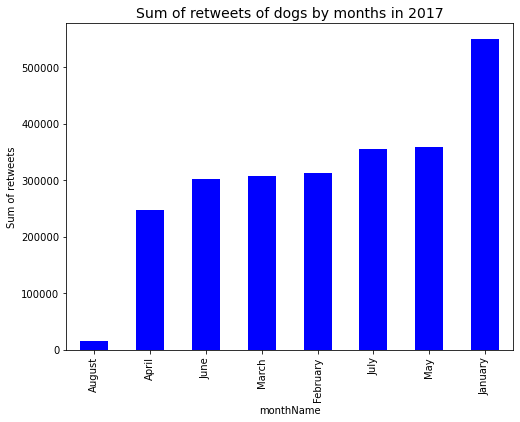

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title("Sum of retweets of dogs by months in 2017", fontsize=14)
plt.xlabel("Months")
plt.ylabel("Sum of retweets")

df_2017.groupby('monthName') ['retweet_count'].sum().sort_values().plot(kind='bar',color='b');
plt.savefig('monthly-retweets-2017.png')

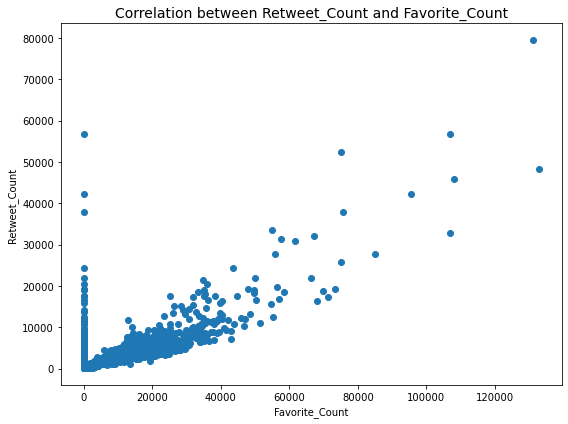

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Correlation between {} and {}'.format('Retweet_Count', 'Favorite_Count'), fontsize=14)
plt.ylabel('Retweet_Count')
plt.xlabel('Favorite_Count')
plt.savefig('Correlation_retweet_favorite.png')
    
plt.show()

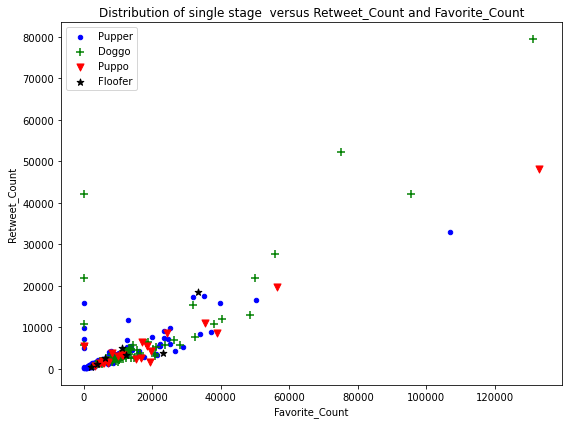

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

pupper = df[df['stage'] == 'pupper']
doggo = df[df['stage'] == 'doggo']
puppo = df[df['stage'] == 'puppo']
floofer = df[df['stage'] == 'floofer']

plt.figure(figsize=(8,6))
plt.scatter(pupper['favorite_count'], pupper['retweet_count'],color='blue', label='Pupper', s=20)
plt.scatter(doggo['favorite_count'], doggo['retweet_count'],marker='+',color='green', label='Doggo', s=50)
plt.scatter(puppo['favorite_count'], puppo['retweet_count'],marker='v',color='red', label='Puppo', s=50)
plt.scatter(floofer['favorite_count'], floofer['retweet_count'],marker='*',color='black', label='Floofer', s=50)

plt.title('Distribution of single stage  versus {} and {}'.format('Retweet_Count', 'Favorite_Count'), fontsize=12)
plt.ylabel('Retweet_Count')
plt.xlabel('Favorite_Count')
plt.legend(loc='best')
plt.savefig('Breeds_retweet_favorite.png')
    
plt.show()

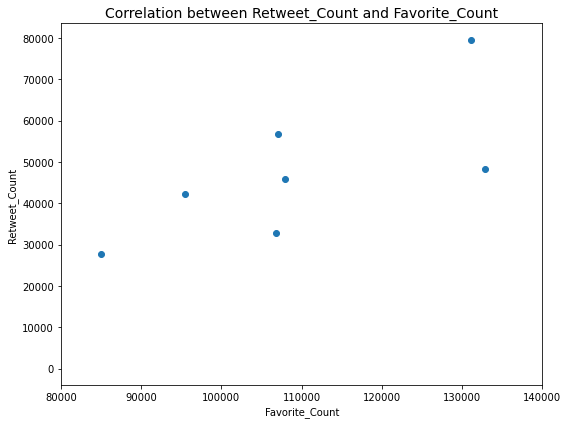

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.title('Correlation between {} and {}'.format('Retweet_Count', 'Favorite_Count'), fontsize=14)
plt.xlim(80000, 140000)
plt.ylabel('Retweet_Count')
plt.xlabel('Favorite_Count')
plt.savefig('Correlation_retweet_favorite.png')
    
plt.show()

In [87]:
df.query('(retweet_count >70000) and (favorite_count > 120000)')[['name','p1','p2','p3','retweet_count','favorite_count']]

,name,p1,p2,p3,retweet_count,favorite_count
851,None,Labrador_retriever,Ice_bear,Whippet,79515,131075


In [96]:
df.query('favorite_count == 0')[['name','p1','p2','p3','retweet_count','favorite_count','rating_numerator']]\
.sort_values('retweet_count', ascending=False).head(10)

,name,p1,p2,p3,retweet_count,favorite_count,rating_numerator
209,Stephan,Chihuahua,Pomeranian,Toy_terrier,56625,0,13
355,Bo,Standard_poodle,Toy_poodle,Tibetan_terrier,42228,0,14
129,None,Arabian_camel,House_finch,Cocker_spaniel,37911,0,13
723,None,Labrador_retriever,Golden_retriever,Ice_bear,24319,0,10
356,Sunny,Prison,Palace,Umbrella,21794,0,14
708,None,Brown_bear,Indian_elephant,Water_buffalo,20500,0,13
32,Lilly,Labrador_retriever,Seat_belt,Pug,19297,0,13
775,None,Upright,Golden_retriever,Brittany_spaniel,18963,0,13
627,None,Golden_retriever,Labrador_retriever,Doormat,17621,0,12
215,Ken,Ice_bear,Samoyed,Eskimo_dog,17504,0,13


#### Research question 2 - What is the average retweet_count that each stage obtain from different users?

In [101]:
stage_list = ["pupper","doggo","puppo","floofer"]
single_stage = df.query('stage in @stage_list')
single_stage['stage'].unique()

array(['doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [102]:
single_stage.shape

(307, 29)

In [162]:
avg_retweet = single_stage.groupby(['stage','name'])['retweet_count'].mean()
avg_retweet

42228.0

In [151]:
avg_retweet = single_stage.groupby(['stage','name']).mean()
avg_retweet.sort_values('retweet_count', ascending=False)
avg_retweet = avg_retweet.groupby(level=[0,1]).head(3).reset_index() [['stage','name','retweet_count']]
avg_retweet

,stage,name,retweet_count
0,doggo,Anakin,4627.0
1,doggo,Astrid,10706.0
2,doggo,Barney,13076.0
3,doggo,Bo,42228.0
4,doggo,Cassie,7711.0
...,...,...,...
168,puppo,Sebastian,11007.0
169,puppo,Shikha,2697.0
170,puppo,Snoopy,4319.0
171,puppo,Stuart,2321.0


#### Research question 3 - What are the top 10 breeds of p1 with the highest favorite_count?


In [115]:
df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)

p1
Golden_retriever      1696627
Labrador_retriever    1123850
Pembroke               994755
Chihuahua              676441
Samoyed                542991
French_bulldog         465738
Chow                   404241
Pug                    320223
Cocker_spaniel         315825
Pomeranian             299114
Name: favorite_count, dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2073 non-null   int64         
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2073 non-null   datetime64[ns]
 4   source                      2073 non-null   object        
 5   text                        2073 non-null   object        
 6   retweeted_status_id         79 non-null     float64       
 7   retweeted_status_user_id    79 non-null     float64       
 8   retweeted_status_timestamp  79 non-null     object        
 9   expanded_urls               2073 non-null   object        
 10  rating_numerator            2073 non-null   int64         
 11  rating_denominator          2073 non-null   int64       

In [117]:
df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2073.000000,2073.000000
mean,2976.089243,8556.718283
std,5054.897526,12098.640994
min,16.000000,0.000000
25%,634.000000,1674.000000
50%,1408.000000,3864.000000
75%,3443.000000,10937.000000
max,79515.000000,132810.000000


#### Research question 3 - Which breeds of dogs in p1 appeared more than once where retweet_count is greater than 15,000 and favorite_count is greater than 30,000?

In [131]:
# Create a dataframe that holds records where retweet_count greater than 15,000 and favorite_count is greater than 30,000
df_retweet_fav_count = df.query('(retweet_count > 15000) and (favorite_count > 30000) and (name != "None")')
df_retweet_fav_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,monthName,int_year
22,887473957103951883,NaN,NaN,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,...,0.809197,True,Rhodesian_ridgeback,0.054950,True,Beagle,0.038915,True,July,2017
34,884925521741709313,NaN,NaN,2017-07-12 00:01:00,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884925521...,...,0.259916,True,American_staffordshire_terrier,0.198451,True,Staffordshire_bullterrier,0.127725,True,July,2017
59,879415818425184262,NaN,NaN,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,...,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True,June,2017
66,877736472329191424,NaN,NaN,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,...,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True,June,2017
96,870374049280663552,NaN,NaN,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,...,0.841001,True,Great_pyrenees,0.099278,True,Labrador_retriever,0.032621,True,June,2017
112,866450705531457537,NaN,NaN,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,...,0.905334,True,Boston_bull,0.078060,True,Pug,0.001771,True,May,2017
113,866334964761202691,NaN,NaN,2017-05-21 16:48:45,Twitter for iPhone,This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,...,0.984086,True,Pomeranian,0.007919,True,Keeshond,0.003328,True,May,2017
282,830583320585068544,NaN,NaN,2017-02-12 01:04:29,Twitter for iPhone,This is Lilly. She just parallel barked. Kindl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830583320...,...,0.908703,True,Seat_belt,0.057091,False,Pug,0.011933,True,February,2017
290,829011960981237760,NaN,NaN,2017-02-07 17:00:28,Twitter for iPhone,This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829011960...,...,0.312221,True,Dalmatian,0.244040,True,Conch,0.130273,False,February,2017
334,822462944365645825,NaN,NaN,2017-01-20 15:17:01,Twitter for iPhone,This is Gabe. He was the unequivocal embodimen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822462944...,...,0.960199,True,Samoyed,0.023056,True,Maltese_dog,0.008945,True,January,2017


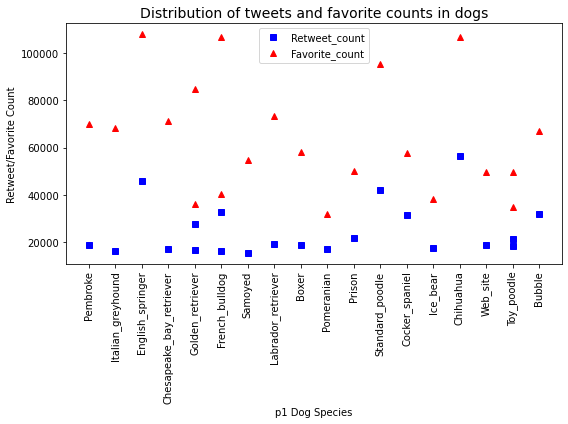

In [133]:
plt.figure(figsize=(8,6))

plt.plot(df_retweet_fav_count['p1'], df_retweet_fav_count['retweet_count'], 'bs', label='Retweet_count')
plt.plot(df_retweet_fav_count['p1'], df_retweet_fav_count['favorite_count'], 'r^', label='Favorite_count')
plt.xlabel('p1 Dog Species')
plt.ylabel('Retweet/Favorite Count')
plt.title('Distribution of tweets and favorite counts in dogs', fontsize=14)
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.savefig('p1_dog_species.png')

plt.show()